## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)<br/>
    - 3.1  [Pre Profiling](#section301)<br/>
    - 3.2  [Preprocessing](#section302)<br/>
    - 3.3  [Post Profiling](#section303)<br/>
4. [Questions](#section4)<br/>
    - 4.1  [How many movies are produced year by year?](#section401)<br/>
    - 4.2  [How critics ratings vary year by year?](#section402)<br/>
    - 4.3  [Who are the top 10 actors by the numbers of movies done by them?](#section403)<br/>
    - 4.4  [What are the top 10 runtimes of movies ?](#section404)<br/>
    - 4.5  [Top Directors w.r.t Revenue](#section405)<br/>
    - 4.6  [Why top director earned more ?](#section406)<br/>
    - 4.7  [Top Directors w.r.t Rating](#section407)<br/>
    - 4.8  [Why top director got high Rating ?](#section408)<br/>
    - 4.9  [Max. movies got which Rating ?](#section409)<br/>
    - 4.10 [Distribution of Ratings](#section410)<br/>
    - 4.11 [Genre Trend in Part1 of Rating](#section411)<br/>
    - 4.12 [Genre Trend in Part2 of Rating](#section412)<br/>
    - 4.13 [Genre Trend in Part3 of Rating](#section413)<br/>
    - 4.14 [Analysing Metascore and Rating](#section414)<br/>
    - 4.15 [Analysing Rating and Votes.](#section415)<br/>
    - 4.16 [Analysing Votes and Revenue](#section416)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

<a id = "section 1"></a>
### 1. Problem Statement

The Notebook explores the movie data set and performs __Exploratory Data Analysis(EDA)__ over those data sets.

<a id=section2></a>

### 2. Data Loading and Description

- The dataset consists of the information about various movies from the year 2006 to 2016. Various variables present in the dataset includes data of Title, Genre, Director, Rating etc. 
- The dataset comprises of __1000 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name        | Description                                               |
| ------------------ |:-------------:| 
| Rank               | Movie rank                                                | 
| Title              | The title of the movie                                    |  
| Genre              | A comma-separated list of genres used to classify the film| 
| Description        | Movie summary                                             |   
| Director           | The name of the film's director                           |
| Actors             | A comma-separated list of the main stars in the movie.    |
| Year               | The year that the film released.                          |
| Runtime (Minutes)  | The duration of the film in minutes.                      |
| Rating             | User rating for the movie 0-10                            |
| Votes              | Number of votes                                           |
| Revenue (Millions) | Movie revenue in millions                                 |
| Metascore          | An aggregated average of critic scores. Values are between 0 and 100. Higher scores       represent positive reviews.                                                      |

#### Some Background Information

A film, also called a movie, motion picture, moving picture, or photoplay, is a series of still images that, when shown on a screen, create the illusion of moving images. 
Films are cultural artifacts created by specific cultures. They reflect those cultures, and, in turn, affect them. Film is considered to be an important art form, a source
of popular entertainment, and a powerful medium for educating or indoctrinating citizens. The visual basis of film gives it a universal power of communication. 
Some films have become popular worldwide attractions through the use of dubbing or subtitles to translate the dialog into other languages.

#### Importing packages  

In [2]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib as mat                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import matplotlib.pyplot as plt
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

#### Importing the Dataset

In [3]:
movie_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')

In [4]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


<a id=section3></a>

## 3. Data Profiling

<a id=section301></a>

### 3.1 Pre Profiling

In [4]:
profile = pandas_profiling.ProfileReport(movie_data)
profile.to_file(outputfile="movie_before_preprocessing.html")

- From the above profiling, we can observe that __Revenue (Millions) and Metascore__ columns have missing values. 

<a id=section302></a>

### 3.2 Preprocessing

- Dealing with missing values<br/>
    - Replacing missing values of __Metascore__ and __Revenue (Millions)__ with median values.
    - Replacing one zero value of __Revenue (Millions)__ with median value.

In [5]:
median_metascore  = movie_data.Metascore.median()
movie_data.fillna(median_metascore, inplace=True)

In [6]:
revenue_median = movie_data["Revenue (Millions)"].median()
movie_data["Revenue (Millions)"].fillna(revenue_median,inplace=True)

In [7]:
movie_data['Revenue (Millions)'] = movie_data['Revenue (Millions)'].replace(0, movie_data['Revenue (Millions)'].median())

<a id=section303></a>

### 3.3 Post Pandas Profiling

In [8]:
profile = pandas_profiling.ProfileReport(movie_data)
profile.to_file(outputfile="movie_after_preprocessing.html")

<a id=section4></a>

### 4. Questions

<a id=section401></a>

### 4.1 How many movies are produced year by year  ?

Text(0.5, 1.0, 'Movies Count By Years')

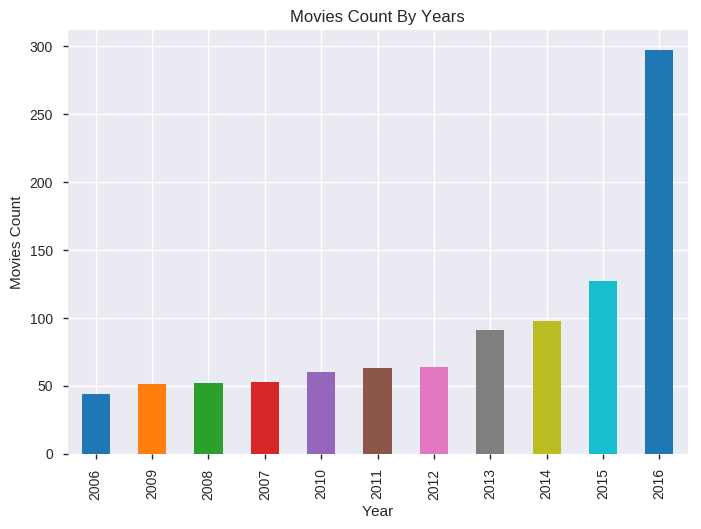

In [9]:
movies_year_count =  movie_data['Year'].value_counts().sort_values().plot(kind='bar')
movies_year_count.set_xlabel('Year')
movies_year_count.set_ylabel('Movies Count')
movies_year_count.set_title('Movies Count By Years')

<a id=section402></a>

-  "Movie count by Year" graph shows a consistent rise in __Movies Count__ w.r.t year.

### 4.2 How critics ratings vary year by year ?

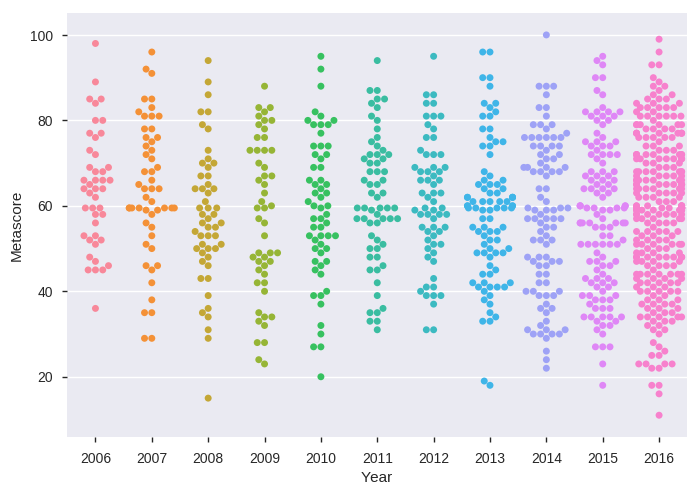

In [10]:
sns.swarmplot(x="Year", y="Metascore", data=movie_data)

<a id=section403></a>

- From  the graph  we can see most movies have metascore between 30 to 90 from year 2006 to 20016.
- We can view  that only  3 movies have just approached the metascore of 100  from year 2006 to 2016.

### 4.3 Who are the top 10 actors by the numbers of movies done by  them ?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc589375160>],
      dtype=object)

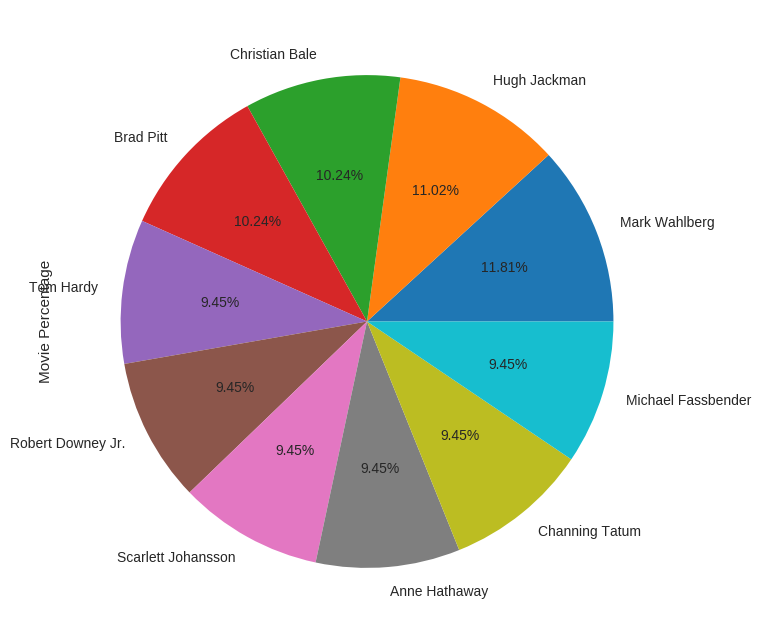

In [12]:
import itertools
actors_unique_comb = movie_data['Actors'].unique()
individual_actor = []
for actor in actors_unique_comb:
    individual_actor.append(actor.split(sep=','))
actors=list(itertools.chain.from_iterable(individual_actor))
unique_actors = set(actors)
actor_movie_count = np.zeros(len(unique_actors))
i = 0
for actor in unique_actors:
    current = movie_data.Actors.str.contains(actor).fillna(False)
    p = len(movie_data[current])
    actor_movie_count[i]=p
    i += 1

actor_ = pd.DataFrame(actor_movie_count, index=unique_actors, columns=['Movie Percentage'])
actor_.sort_values(by='Movie Percentage', ascending=False).head(10).plot(kind='pie', autopct='%.2f%%', subplots=True, figsize=(8, 8), legend=False)

<a id=section404></a>

- "Movie Percentage" pie chart shows that __Huge Jackman__ and __Mark Wahlberg__ have given more movies than others.

### 4.4  what are the top 10 runtimes of movies ?

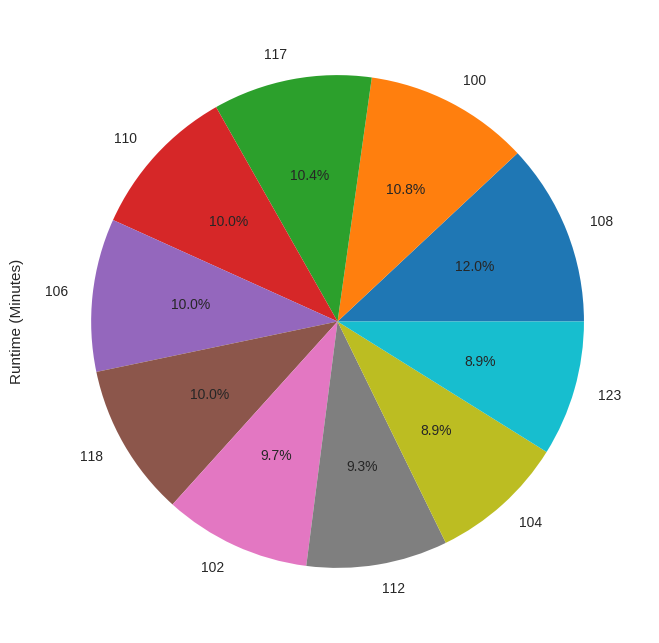

In [13]:
movie_data['Runtime (Minutes)'].value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(8,8))

<a id=section405></a>

- We can infer that most of the movies __Runtime(Minutes)__ tends to be less than or equal to 110.

### 4.5 Top Directors w.r.t Revenue

Text(0.5, 1.0, 'Top Directors w.r.t Revenue')

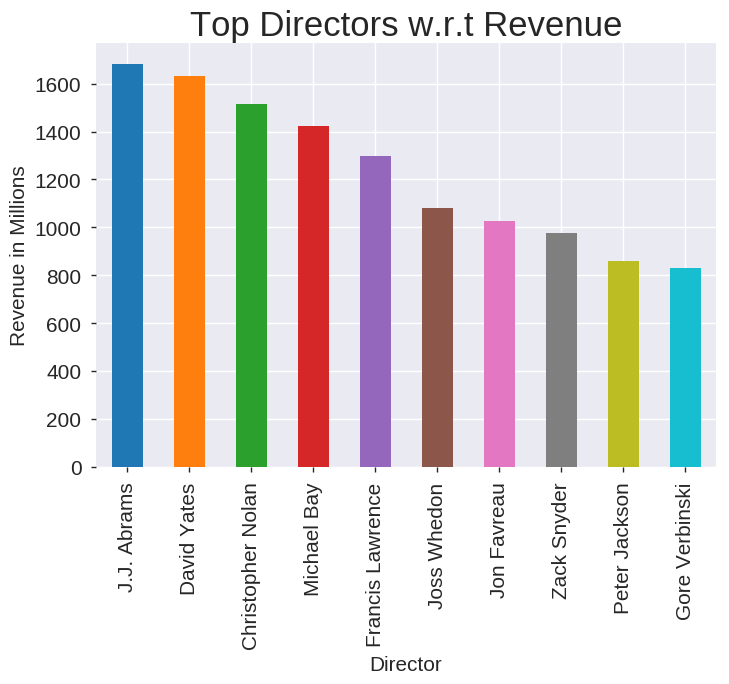

In [14]:
director_grp = movie_data.groupby(["Director"]).sum().reset_index().sort_values(by=["Revenue (Millions)"],ascending=False).head(10)
add_axis = director_grp.plot.bar(x="Director",y="Revenue (Millions)",legend=False,fontsize=15)
add_axis.set_xlabel("Director",fontsize=15)
add_axis.set_ylabel("Revenue in Millions",fontsize=15)
add_axis.set_title("Top Directors w.r.t Revenue",fontsize=25)

- "Top Directors w.r.t Revenues" graph shows that __"J.J. Abrams"__ is the most successful director w.r.t Revenues

<a id=section406></a>

### 4.6 Why top director earned more ?

Text(0.5, 1.0, 'J.J. Abrams movies revenue')

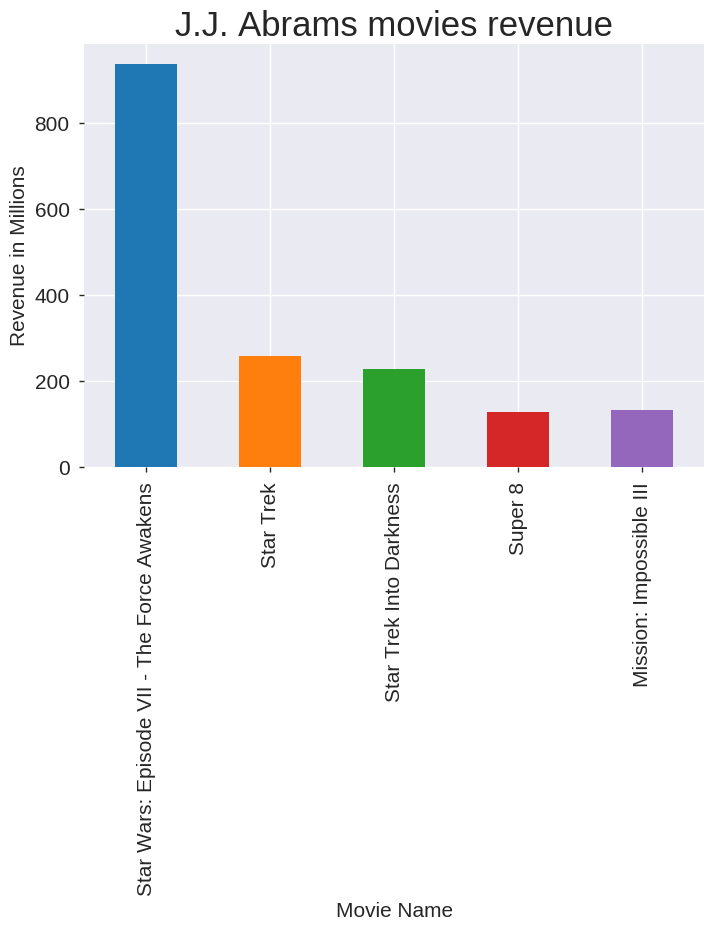

In [15]:
JJ_movies = movie_data[(movie_data['Director'] == 'J.J. Abrams')]
JJ_movies_plot = JJ_movies.plot.bar(x="Title",y="Revenue (Millions)",legend=False,fontsize=15)
JJ_movies_plot.set_xlabel("Movie Name",fontsize=15)
JJ_movies_plot.set_ylabel("Revenue in Millions",fontsize=15)
JJ_movies_plot.set_title("J.J. Abrams movies revenue",fontsize=25)

- We can see from above graph that, __J.J. Abrams__ revenue is at the top due to __"Star Wars : Episode VII - The Force Awakens"__ movie which contributed almost 55% of his revenue (to be specific 936.63 millions) and this is the highest earning movie

<a id=section407></a>

### 4.7 Top Director w.r.t Rating

Text(0.5, 1.0, 'Top Directors w.r.t Rating')

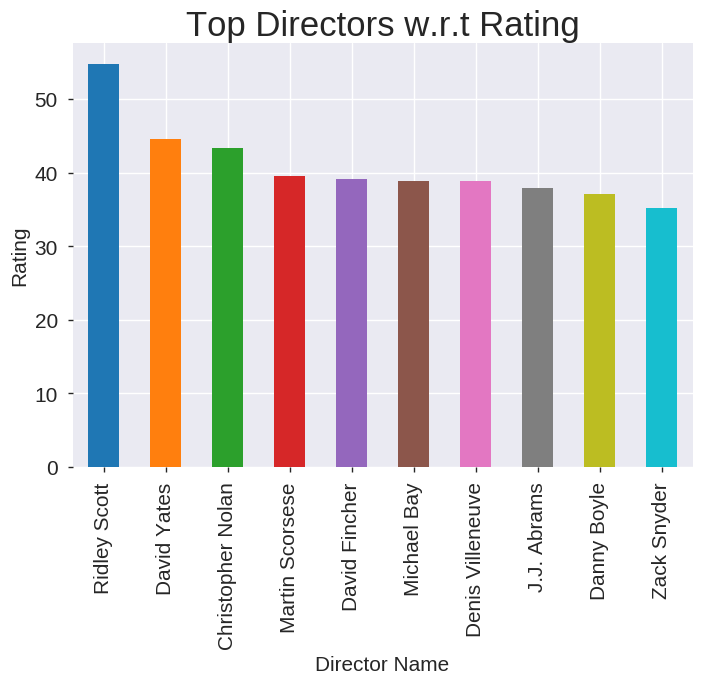

In [16]:
director_rating = movie_data.groupby(["Director"]).sum().reset_index().sort_values(by=["Rating"],ascending=False).head(10)
director_rating
rating_add_axis = director_rating.plot.bar(x="Director",y="Rating",legend=False,fontsize=15)
rating_add_axis.set_xlabel("Director Name",fontsize=15)
rating_add_axis.set_ylabel("Rating",fontsize=15)
rating_add_axis.set_title("Top Directors w.r.t Rating",fontsize=25)

- "Top Directors w.r.t Rating" graph shows that __"Ridley Scott"__ is the most successful director w.r.t Rating

<a id=section408></a>

### 4.8 Why top director got high rating ?

/home/necuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Number of Movies Released')

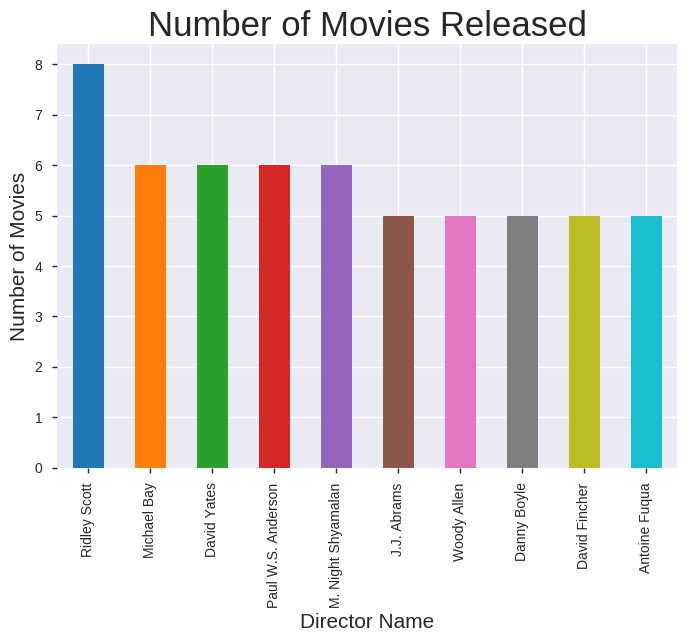

In [17]:
Rid_rating = movie_data[(movie_data['Director'] == 'Ridley Scott')]
Rid_rating.sort_values(by="Rating",ascending = False,inplace=True)
dir_movies = (movie_data['Director'].value_counts().head(10).plot.bar())
dir_movies.set_xlabel("Director Name",fontsize=15)
dir_movies.set_ylabel("Number of Movies",fontsize=15)
dir_movies.set_title("Number of Movies Released",fontsize=25)

Text(0.5, 1.0, 'Ridley Scott Movies Rating')

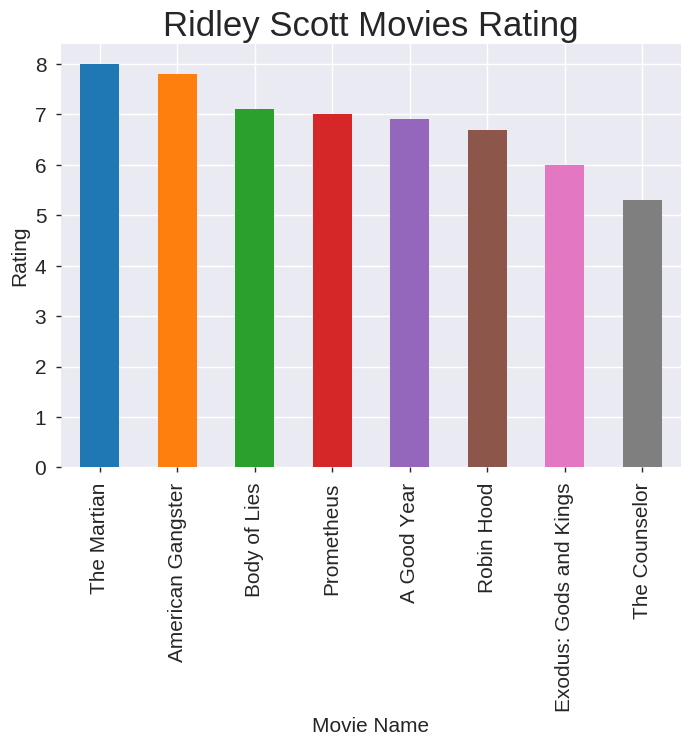

In [18]:
rid_rating_add_axis = Rid_rating.plot.bar(x="Title",y="Rating",legend=False,fontsize=15)
rid_rating_add_axis.set_xlabel("Movie Name",fontsize=15)
rid_rating_add_axis.set_ylabel("Rating",fontsize=15)
rid_rating_add_axis.set_title("Ridley Scott Movies Rating",fontsize=25)

 - Why Riddley Scott got max. rating?
    - Maximum movies are released by __"Ridley Scott"__
    - People likely to give good rating to the "Ridley Scott" movie as we can see that almost all his movies got 6 or more than 6 rating except one movie.

Text(0.5, 1.0, 'Rating v/s Count')

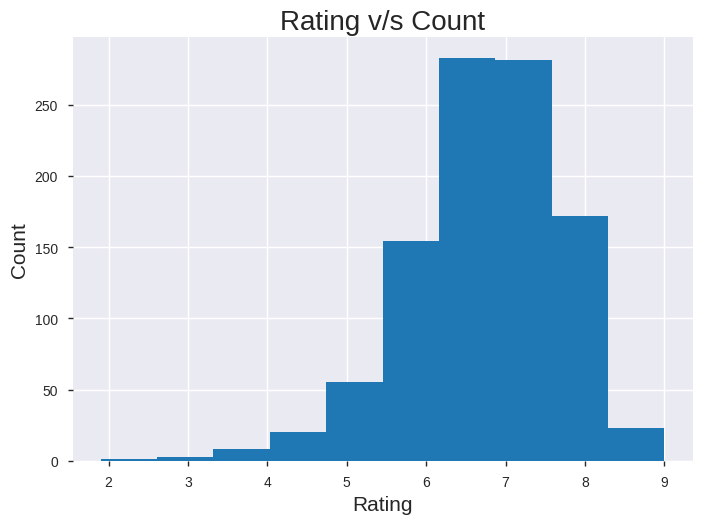

In [19]:
rati_part = movie_data["Rating"].plot.hist()
rati_part.set_xlabel("Rating",fontsize=15)
rati_part.set_ylabel("Count",fontsize=15)
rati_part.set_title("Rating v/s Count",fontsize=20)

- We can see from above histogram that:
    - Part 1 : 6.1 to 7.5 rating (This is where most of the Rating lie)
    - Part 2 : Less than 6.1
    - Part 3 : Greater than 7.5

<a id=section409></a>

### 4.9 Maximum movies got which Rating ?

Text(0.5, 1.0, 'Max. movie got which Rating?')

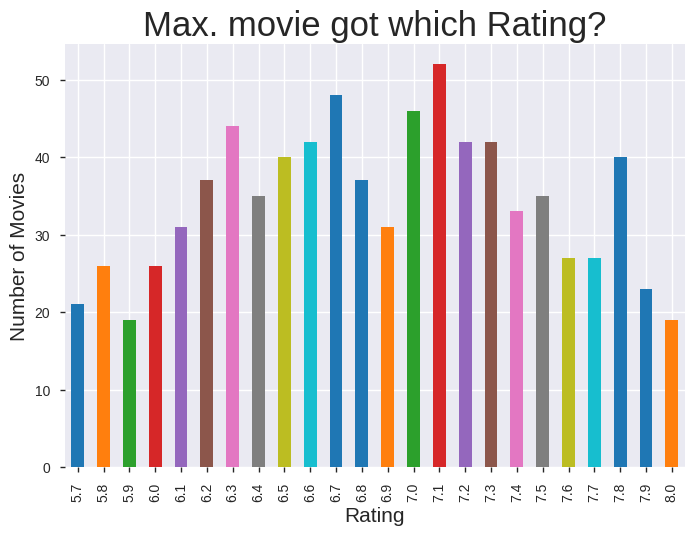

In [20]:
rating_df = movie_data[(movie_data['Rating'] > 5.6) & (movie_data['Rating'] < 8.1)]
rating_df_add_axis = rating_df["Rating"].value_counts().sort_index().plot.bar()
rating_df_add_axis.set_xlabel("Rating",fontsize=15)
rating_df_add_axis.set_ylabel("Number of Movies",fontsize=15)
rating_df_add_axis.set_title("Max. movie got which Rating?",fontsize=25)

- Above graph shows that Max. numbers of movies got 7.1 rating

<a id=section410></a>

### 4.10 Distribution of Ratings

% of movies lie in 6.1 to 7.5 range 59.5
% of movies lie in < 6.1 range 21.0
% of movies lie in > 7.5 range 19.5


Text(0.5, 1.0, 'Distribution of Ratings')

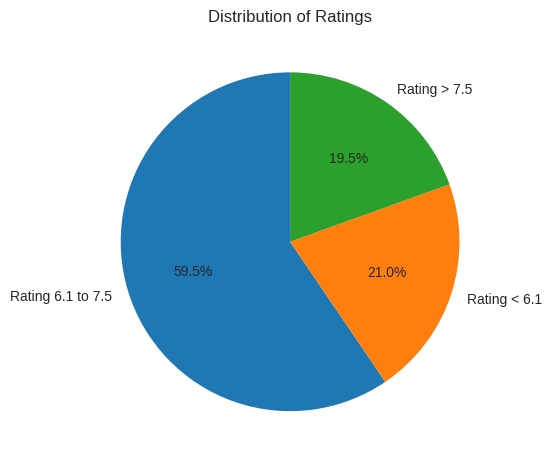

In [21]:
rating_df = movie_data[(movie_data['Rating'] > 6.0 ) & (movie_data['Rating'] < 7.6)]
a = rating_df["Rating"].count()
max_data = (a/1000)*100
print("% of movies lie in 6.1 to 7.5 range",max_data)
b = movie_data[(movie_data['Rating'] <= 6.0 )].count()
min_data = (b["Rating"]/1000)*100
print("% of movies lie in < 6.1 range",min_data)
c = movie_data[(movie_data['Rating'] >= 7.6 )].count()
great_max_data = (c["Rating"]/1000)*100
print("% of movies lie in > 7.5 range",great_max_data)
activities = ["Rating 6.1 to 7.5","Rating < 6.1","Rating > 7.5"]
data = [max_data,min_data,great_max_data]
mat.pyplot.pie(x = data,labels=activities, autopct='%.1f%%',startangle=90)
mat.pyplot.title("Distribution of Ratings")

- We can see that:
    - Part1 (6.1 to 7.5) :      Contributes 59.5% of the movies data
    - Part2 (Less than 6.1) :   Contributes 21% of the movies data
    - Part3 (Greater than 7.5): Contributes 19.5% of the movies data

<a id=section411></a>

### 4.11 Genre Trend in Part1 of Rating (i.e. movies which got Rating from 6.1 to 7.5)

In [22]:
G1 = rating_df["Genre"].str.split(",",n = 2, expand = True)
total = G1[0].count() + G1[1].count() + G1[2].count()
G2 = pd.DataFrame()
G2[0] = G1[0].append(G1[1]).append(G1[2]).reset_index(drop=True)
G2.dropna(inplace=True)

Text(0.5, 1.0, 'Part1 Genre Trend')

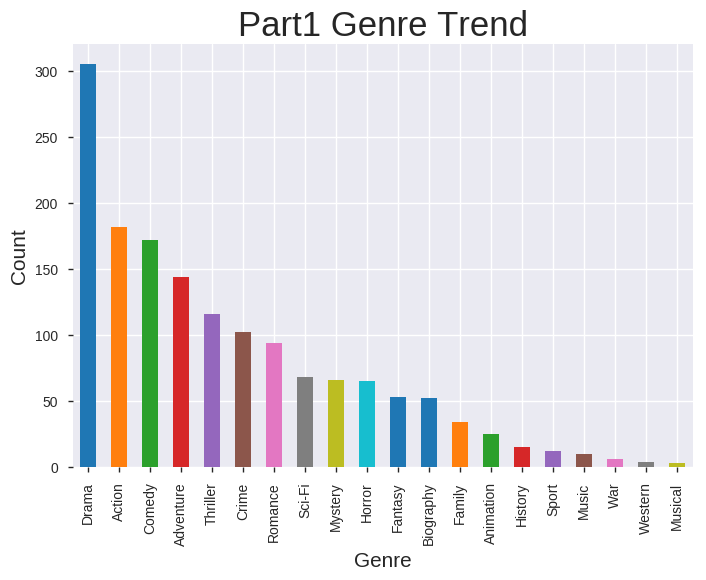

In [23]:
G2_add_axis = G2[0].value_counts().plot.bar()
G2_add_axis.set_xlabel("Genre",fontsize=15)
G2_add_axis.set_ylabel("Count",fontsize=15)
G2_add_axis.set_title("Part1 Genre Trend",fontsize=25)

- We can see from above graph that in Part1 "Drama" is the most dominating Genre

Text(0.5, 1.0, 'Distribution of Genre in Part 1')

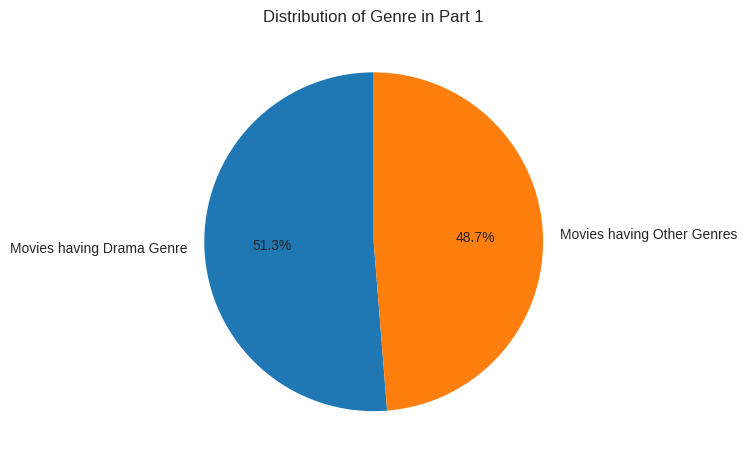

In [24]:
part1_drama = (G2[G2[0]=="Drama"].count())/a
part1_others = 1 - part1_drama
activities = ["Movies having Drama Genre","Movies having Other Genres"]
data = [part1_drama,part1_others]
mat.pyplot.pie(x = data,labels=activities, autopct='%.1f%%',startangle=90)
mat.pyplot.title("Distribution of Genre in Part 1")

- We can say 51.3% of the part1 movies having "Drama" Genre

<a id=section412></a>

### 4.12 Genre Trend in Part2 of Rating (i.e. movies which got Rating less than 6.1)

Text(0.5, 1.0, 'Part2 Genre Trend')

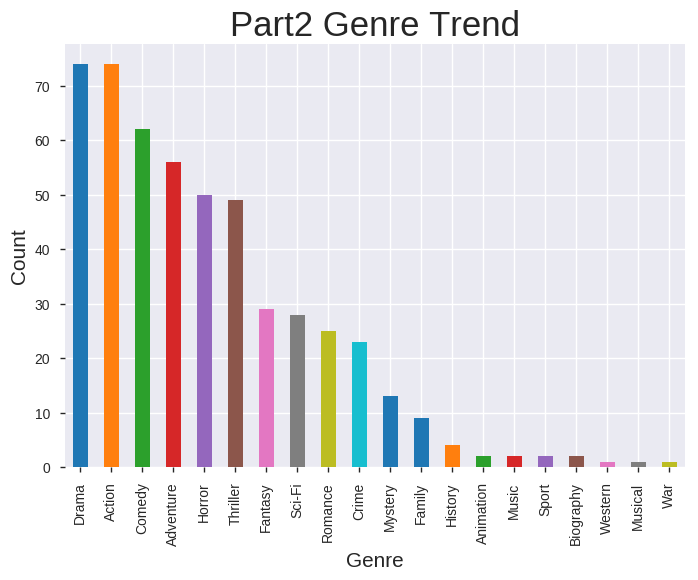

In [25]:
b_part2 = movie_data[(movie_data['Rating'] <= 6.0 )]
G1_less = b_part2["Genre"].str.split(",",n = 2, expand = True)
total_less = G1_less[0].count() + G1_less[1].count() + G1_less[2].count()
G2_less = pd.DataFrame()
G2_less[0] = G1_less[0].append(G1_less[1]).append(G1_less[2]).reset_index(drop=True)
G2_less_add_axis = G2_less[0].value_counts().plot.bar()
G2_less_add_axis.set_xlabel("Genre",fontsize=15)
G2_less_add_axis.set_ylabel("Count",fontsize=15)
G2_less_add_axis.set_title("Part2 Genre Trend",fontsize=25)

- We can see from above graph that in Part2 "Drama" and "Action" both are dominating w.r.t other Genere

Text(0.5, 1.0, 'Distribution of Genre in Part 2')

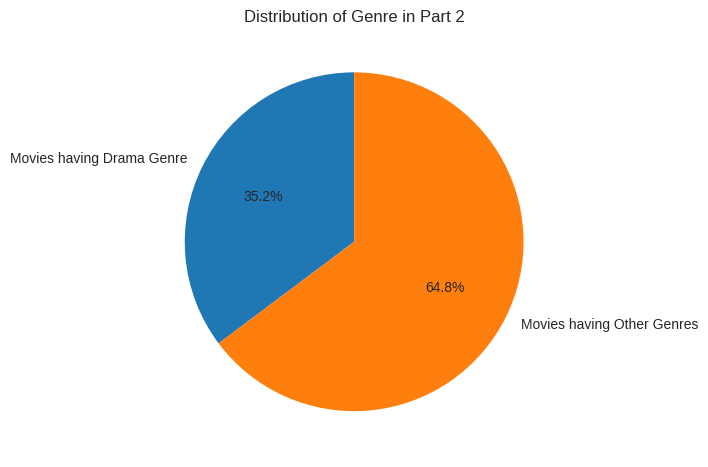

In [26]:
part2_drama = (G2_less[G2_less[0]=="Drama"].count())/b["Genre"]
part2_others = 1 - part2_drama
activities = ["Movies having Drama Genre","Movies having Other Genres"]
data = [part2_drama,part2_others]
mat.pyplot.pie(x = data,labels=activities, autopct='%.1f%%',startangle=90)
mat.pyplot.title("Distribution of Genre in Part 2")

- We can say 35.2% of the part2 movies having "Drama" Genre

<a id=section413></a>

### 4.13 Genre Trend in Part3 of Rating (i.e. movies which got Rating greater than 7.5)

Text(0.5, 1.0, 'Part3 Genre Trend')

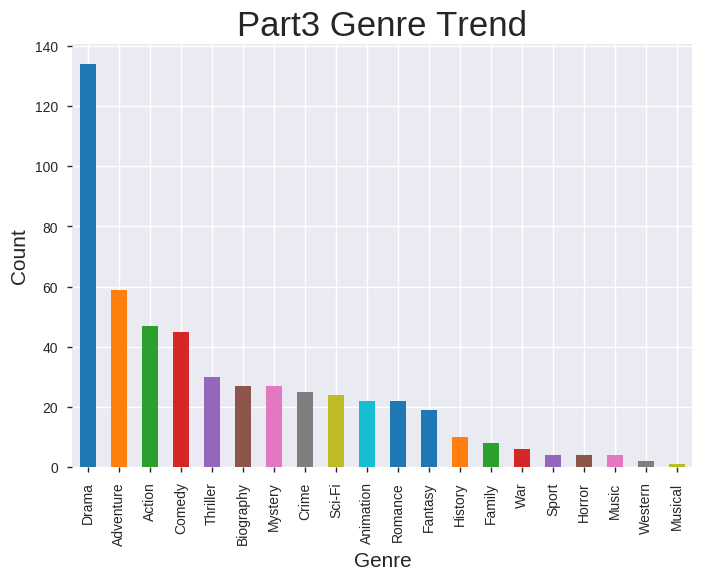

In [27]:
c_part3 = movie_data[(movie_data['Rating'] > 7.5 )]
G1_more = c_part3["Genre"].str.split(",",n = 2, expand = True)
total_more = G1_more[0].count() + G1_more[1].count() + G1_more[2].count()
G2_more = pd.DataFrame()
G2_more[0] = G1_more[0].append(G1_more[1]).append(G1_more[2]).reset_index(drop=True)
G2_more_add_axis = G2_more[0].value_counts().plot.bar()
G2_more_add_axis.set_xlabel("Genre",fontsize=15)
G2_more_add_axis.set_ylabel("Count",fontsize=15)
G2_more_add_axis.set_title("Part3 Genre Trend",fontsize=25)

- We can see from above graph that in Part3 "Drama" is most dominating w.r.t other Genere

Text(0.5, 1.0, 'Distribution of Genre in Part 3')

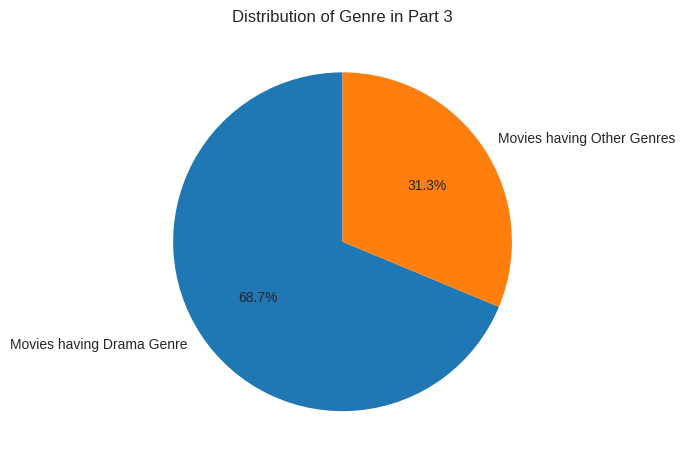

In [28]:
part3_drama = (G2_more[G2_more[0]=="Drama"].count())/c["Genre"]
part3_others = 1 - part3_drama
activities = ["Movies having Drama Genre","Movies having Other Genres"]
data = [part3_drama,part3_others]
mat.pyplot.pie(x = data,labels=activities, autopct='%.1f%%',startangle=90)
mat.pyplot.title("Distribution of Genre in Part 3")

- We can say 68.7% of the part3 movies having "Drama" Genre

<a id=section414></a>

### 4.14 Analysing Metascore and Rating

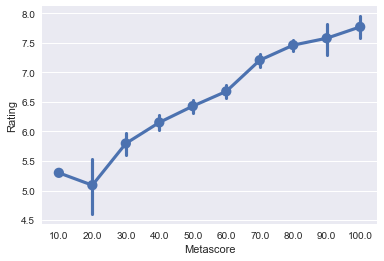

In [112]:
movie_data['Metascore'] = movie_data['Metascore'].round(decimals=-1)
sns.pointplot(x="Metascore", y='Rating', data=movie_data)

- Metascore v/s Rating graph shows that as Metascore increases Rating also increases

<a id=section415></a>

### 4.15 Analysing Rating and Votes

Text(0.5, 1.0, 'Rating v/s Votes')

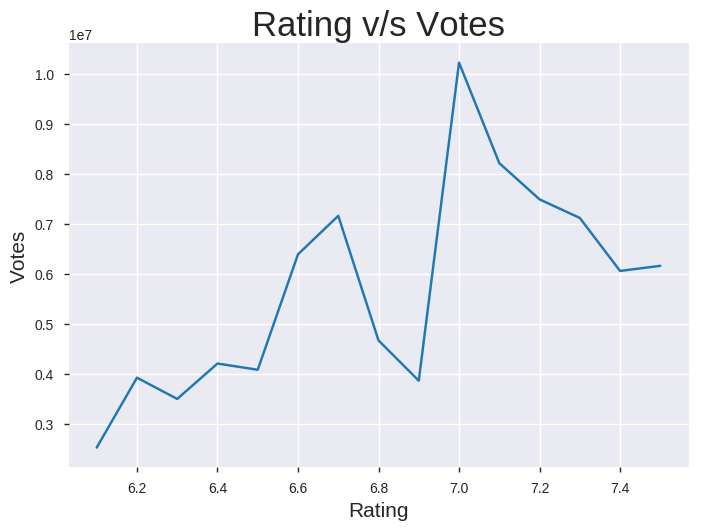

In [29]:
rating_grp = rating_df.groupby(['Rating']).sum().reset_index()
plt.plot(rating_grp["Rating"],rating_grp["Votes"])
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Votes",fontsize=15)
plt.title("Rating v/s Votes",fontsize=25)

- Rating v/s Votes graph shows that as Rating increases Votes also increases

<a id=section416></a>

### 4.16 Analysing Votes and Revenue

Text(0.5, 1.0, 'Votes v/s Revenue')

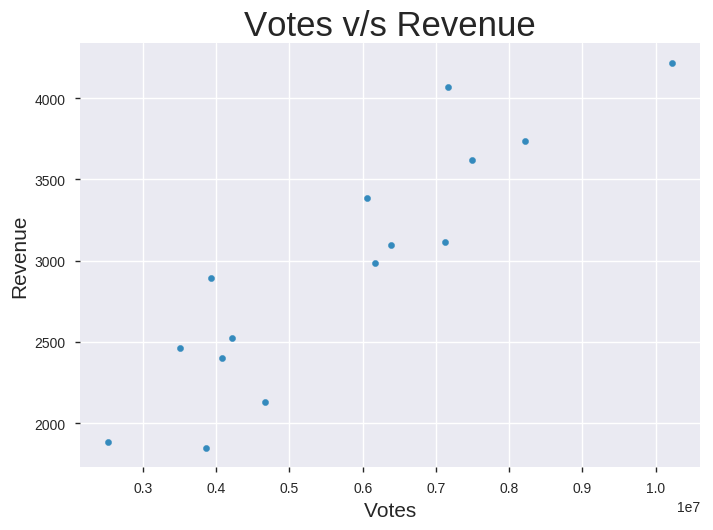

In [30]:
vote_revenue = rating_grp.plot.scatter(x="Votes",y="Revenue (Millions)")
vote_revenue.set_xlabel("Votes",fontsize=15)
vote_revenue.set_ylabel("Revenue",fontsize=15)
vote_revenue.set_title("Votes v/s Revenue",fontsize=25)

- Votes v/s Revenue graph shows that as Votes increases Revenue also increases

<a id=section5></a>

### 5. Conclusions
- From the above analysis, we can conclude that success of the movies (i.e. Revenue) depends upon Metascore,Rating and Votes.
  As Metascore increases Rating increases,as Rating increases Votes increases and as Votes increases Revenue increases
  (__From: Section 4.14, 4.15 and 4.16__)
- We can infer that movies of __Drama__ genre is mostly liked by people.(__From: Section 4.11 and 4.13__)
- Movies which got rating, less than or equal to 6 need to be more focus on having __Drama__ genre. Data says that only 35.2% of the movies in part2 contains Drama genre.(__From: Section 4.12__)
- In order to generate good revenue, director need to analyse the __"Star Wars : Episode VII - The Force Awakens"__ movie and create a movie like "Star Wars : Episode VII" as this movie generates maximum revenue.(__From: Section 4.6__)